# ML: Задача классификации : Ансамбли


## Пример 

Для решения задачи машинного обучения требуется: 

1) данные - набор данных по раку молочной железы  

2) определить тип решаемой задачи - задача классификации

3) определить мертики оценки - матрица (TT, FT, FF, TF) и др. 

4) определить способ визуализации результатов - matplotlib

5) определить метод решения - ансамбли (бэггинг, бустинг, стэкинг)

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [7]:
# Загрузка данных из файла
file_path = './heart.csv'
df = pd.read_csv(file_path)

# Разделяем данные на признаки (data) и цель (target)
data = df.drop(columns=['ChestPainType'])  # Все столбцы, кроме 'ChestPainType'
target = df['ChestPainType']  # Столбец 'ChestPainType' является целевой переменной

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)
for col in data.head():
    data[col] = label_encoder.fit_transform(data[col])

data, target

(     Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
 0     12    1         41          147          0           1     98   
 1     21    0         55           40          0           1     82   
 2      9    1         31          141          0           2     25   
 3     20    0         39           72          0           1     34   
 4     26    1         49           53          0           1     48   
 ..   ...  ...        ...          ...        ...         ...    ...   
 913   17    1         14          122          0           1     58   
 914   40    1         45           51          1           1     67   
 915   29    1         31            9          0           1     41   
 916   29    0         31           94          0           0    100   
 917   10    1         39           35          0           1     99   
 
      ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
 0                 0       10         2             0  
 1                 0  

In [8]:
# разделяем данные на обучающий и тестовый наборы
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, random_state=12)

## Простые модели (без ансамбля)

In [9]:
model_1 = KNeighborsClassifier().fit(X_train, y_train)
print(model_1.score(X_valid, y_valid))
model_1

0.5181159420289855


KNeighborsClassifier()

In [10]:
model_2 = DecisionTreeClassifier().fit(X_train, y_train)
print(model_2.score(X_valid, y_valid))
model_2

0.532608695652174


DecisionTreeClassifier()

In [11]:
model_1.n_features_in_

11

In [12]:
model_1.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

# Ансамбли в библиотеке SKLearn
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

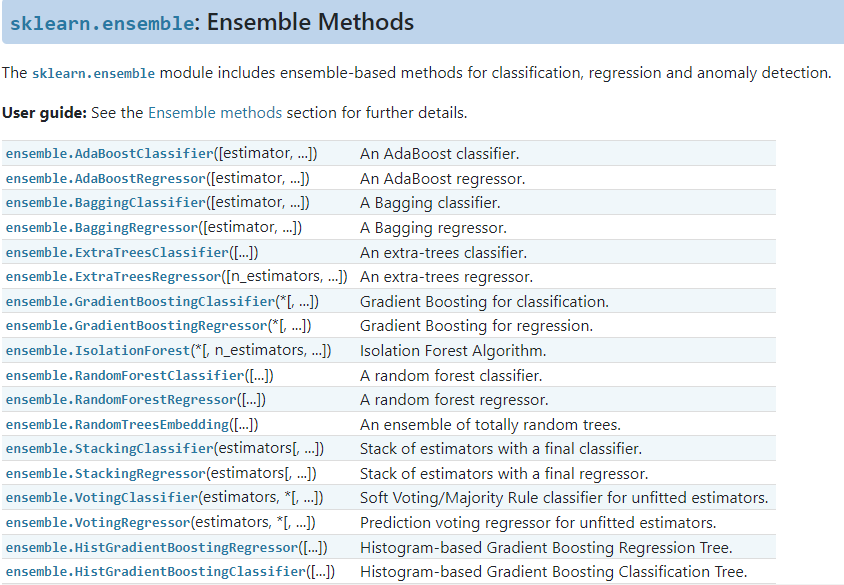

## Стекинг

�?спользуется несколько разнородных слабых учеников. �?х обучают и объединяют для построения прогноза, основанного на результатах различных слабых моделей.
Несколько разных моделей (например, линейная регрессия, дерево решений, нейронная сеть) обучаются на одних и тех же данных.
Эти модели генерируют предсказания на обучающей выборке.
Затем метамодель (например, логистическая регрессия или другое дерево решений) обучается на предсказаниях этих базовых моделей для получения финального результата.

In [13]:
from sklearn.ensemble import StackingClassifier

estimators = [('lr', KNeighborsClassifier()), ('dt', DecisionTreeClassifier())]
modelClf_1 = StackingClassifier(estimators=estimators, final_estimator=SVC())
modelClf_1.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [14]:
print(modelClf_1.score(X_valid, y_valid))

0.5434782608695652


## Бэггинг

Однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения.
Данные разбиваются на случайные подвыборки (с возвращением, "bootstrap sampling").
На каждой подвыборке обучается одна и та же базовая модель (например, Decision Trees).
Результаты усредняются (для регрессии) или выбирается большинством голосов (для классификации).

In [15]:
from sklearn.ensemble import BaggingClassifier

modelClf_2 = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50, random_state=12)
modelClf_2.fit(X_train, y_train)


BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50,
                  random_state=12)

In [16]:
print(modelClf_2.score(X_valid, y_valid))


0.5036231884057971


## Бустинг

Несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.
Модели обучаются последовательно.
На каждом шаге текущая модель пытается исправить ошибки, сделанные предыдущими моделями.
Итоговое предсказание — взвешенная сумма предсказаний всех моделей.

In [17]:
from sklearn.ensemble import AdaBoostClassifier

modelClf_3 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)
modelClf_3.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=12)

In [18]:
print(modelClf_3.score(X_valid, y_valid))

0.5797101449275363


## Градиентный бустинг

In [19]:
from sklearn.ensemble import GradientBoostingClassifier


modelClf_4 = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)
modelClf_4.fit(X_train, y_train)
print(modelClf_4.score(X_valid, y_valid))

0.5760869565217391


In [20]:
modelClf_4

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=150,
                           random_state=12)